<a href="https://colab.research.google.com/github/PatrickRuan/DL-CVMarathon/blob/master/homework/Day021_Transfer_Learning_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 『本次練習內容』
#### 使用Xception backbone做 Trnasfer Learning


## 『本次練習目的』
  #### 了解如何使用Transfer Learning
  #### 了解Transfer Learning的優點，可以觀察模型收斂速度

##### 可以自行嘗試多種架構

In [42]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import keras
from keras.layers import Input
 
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras.applications import ResNet50


input_tensor = Input(shape=(32, 32, 3))
#include top 決定要不要加入 fully Connected Layer

'''Xception 架構'''
modelX = keras.applications.xception.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor, input_shape=None, pooling=None, classes=1000)


"""自行填入"""

'''Resnet 50 架構'''
modelR=keras.applications.ResNet50(include_top=False, weights='imagenet',
                                    input_tensor=input_tensor,
                                    pooling=None, classes=1000)



83689472/83683744 [==============================] - 1s 0us/step


In [2]:
modelX.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 15, 15, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
modelR.summary()

## 添加層數

In [37]:
x = modelR.output

x = Flatten()(x)
x = Dense(1000, activation='relu')(x)

'''可以參考Cifar10實作章節,自行填入'''
predictions = Dense(10,activation='softmax')(x)
model = Model(inputs=modelR.input, outputs=predictions)
print('Model深度：', len(model.layers))


Model深度： 178


In [ ]:
model.summary()

## 鎖定特定幾層不要更新權重

In [39]:
for layer in model.layers[:168]:
    layer.trainable = False
for layer in model.layers[168:]:
    layer.trainable = True

## 準備 Cifar 10 資料

In [40]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test
    
    
## Normalize Training and Testset    
x_train, x_test = normalize(x_train, x_test) 

## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

(50000, 32, 32, 3)


## Training

In [41]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=512,epochs=100, validation_split= 0.2, verbose= 2  )

Epoch 1/100
79/79 - 3s - loss: 0.8269 - accuracy: 0.7241 - val_loss: 0.9286 - val_accuracy: 0.6941
Epoch 2/100
79/79 - 2s - loss: 0.3977 - accuracy: 0.8730 - val_loss: 0.9859 - val_accuracy: 0.6933
Epoch 3/100
79/79 - 2s - loss: 0.2805 - accuracy: 0.9119 - val_loss: 1.0360 - val_accuracy: 0.6926
Epoch 4/100
79/79 - 2s - loss: 0.1973 - accuracy: 0.9431 - val_loss: 1.1401 - val_accuracy: 0.6905
Epoch 5/100
79/79 - 2s - loss: 0.1429 - accuracy: 0.9625 - val_loss: 1.1975 - val_accuracy: 0.6902
Epoch 6/100
79/79 - 2s - loss: 0.1058 - accuracy: 0.9756 - val_loss: 1.2761 - val_accuracy: 0.6921
Epoch 7/100
79/79 - 2s - loss: 0.0744 - accuracy: 0.9864 - val_loss: 1.3494 - val_accuracy: 0.6920
Epoch 8/100
79/79 - 2s - loss: 0.0548 - accuracy: 0.9918 - val_loss: 1.4204 - val_accuracy: 0.6896
Epoch 9/100
79/79 - 2s - loss: 0.0426 - accuracy: 0.9945 - val_loss: 1.4894 - val_accuracy: 0.6921
Epoch 10/100
79/79 - 2s - loss: 0.0308 - accuracy: 0.9972 - val_loss: 1.5466 - val_accuracy: 0.6900
Epoch 11/

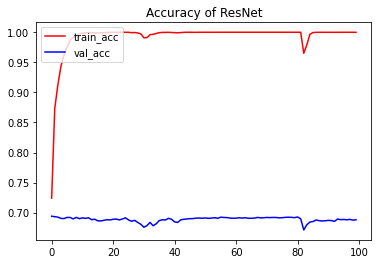

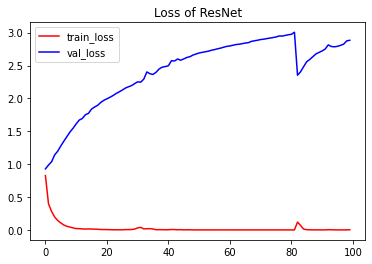

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(100),history.history['accuracy'],  c ='r', label ='train_acc')
plt.plot(range(100),history.history['val_accuracy'],  c ='b', label ='val_acc')
plt.title('Accuracy of ResNet')
plt.legend(loc = 2)
plt.show()

plt.plot(range(100),history.history['loss'], c ='r', label ='train_loss')
plt.plot(range(100),history.history['val_loss'],c ='b', label ='val_loss')
plt.title('Loss of ResNet')
plt.legend(loc = 2)
plt.show()


MODEL X

In [44]:
x = modelX.output

x = Flatten()(x)
x = Dense(1000, activation='relu')(x)

'''可以參考Cifar10實作章節,自行填入'''
predictions = Dense(10,activation='softmax')(x)
model = Model(inputs=modelX.input, outputs=predictions)
print('Model深度：', len(model.layers))


Model深度： 135


In [45]:
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 15, 15, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

## 鎖定特定幾層不要更新權重

In [46]:
for layer in model.layers[:125]:
    layer.trainable = False
for layer in model.layers[125:]:
    layer.trainable = True

## 準備 Cifar 10 資料

In [47]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test
    
    
## Normalize Training and Testset    
x_train, x_test = normalize(x_train, x_test) 

## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

(50000, 32, 32, 3)


## Training

In [48]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=512,epochs=100, validation_split= 0.2, verbose= 2  )

Epoch 1/100
79/79 - 4s - loss: 1.3771 - accuracy: 0.5177 - val_loss: 1.3227 - val_accuracy: 0.5420
Epoch 2/100
79/79 - 3s - loss: 0.9124 - accuracy: 0.6765 - val_loss: 1.1873 - val_accuracy: 0.5884
Epoch 3/100
79/79 - 3s - loss: 0.6582 - accuracy: 0.7669 - val_loss: 1.1480 - val_accuracy: 0.6112
Epoch 4/100
79/79 - 3s - loss: 0.4324 - accuracy: 0.8474 - val_loss: 1.2975 - val_accuracy: 0.6147
Epoch 5/100
79/79 - 3s - loss: 0.2816 - accuracy: 0.9008 - val_loss: 1.5586 - val_accuracy: 0.6064
Epoch 6/100
79/79 - 3s - loss: 0.2225 - accuracy: 0.9213 - val_loss: 1.8379 - val_accuracy: 0.6027
Epoch 7/100
79/79 - 3s - loss: 0.1297 - accuracy: 0.9557 - val_loss: 1.9951 - val_accuracy: 0.6174
Epoch 8/100
79/79 - 3s - loss: 0.1083 - accuracy: 0.9629 - val_loss: 2.2062 - val_accuracy: 0.6216
Epoch 9/100
79/79 - 3s - loss: 0.1035 - accuracy: 0.9642 - val_loss: 2.1144 - val_accuracy: 0.6282
Epoch 10/100
79/79 - 3s - loss: 0.0802 - accuracy: 0.9736 - val_loss: 2.1016 - val_accuracy: 0.6194
Epoch 11/

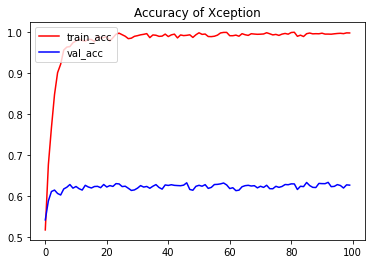

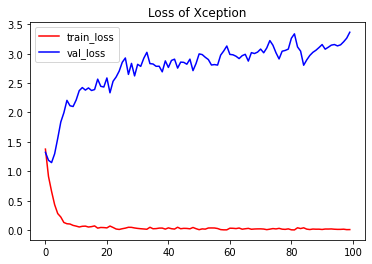

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(100),history.history['accuracy'],  c ='r', label ='train_acc')
plt.plot(range(100),history.history['val_accuracy'],  c ='b', label ='val_acc')
plt.title('Accuracy of Xception')
plt.legend(loc = 2)
plt.show()

plt.plot(range(100),history.history['loss'], c ='r', label ='train_loss')
plt.plot(range(100),history.history['val_loss'],c ='b', label ='val_loss')
plt.title('Loss of Xception')
plt.legend(loc = 2)
plt.show()
